In [1]:
from dir import *
from VAE_model import *
from VAE_model_single import *
from VAE_MoG_model import *
from training import *
from extras import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import torch 
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, Subset
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import itertools
plt.style.use('ggplot')

# 1) Data exploration 

## 1.1) Overall exporation 

In [2]:
data = pd.read_csv(PANGENOME_MATRIX_CSV, index_col=[0], header=[0])

In [3]:
phylogroup_data = pd.read_csv(PHYLOGROUPS_DATA, index_col=[0], header=[0])

In [4]:
phylogroup_data

,Phylogroup
AccessionID,
GCF_000005845,A
GCF_000007445,B2
GCF_000008865,E
GCF_000009565,A
GCF_000010245,A
...,...
GCF_904866495,D
GCF_905071835,F
GCF_905071865,A


In [5]:
data

,GCF_009363035,GCF_016889545,GCF_008065455,GCF_015135355,GCF_000026545,GCF_002012065,GCF_009650175,GCF_016903815,GCF_005221505,GCF_001559655,...,GCF_010365525,GCF_009832985,GCF_013374295,GCF_014168955,GCF_011769865,GCF_000725305,GCF_008124285,GCF_017165375,GCF_001663075,GCF_000022665
GF_ID,,,,,,,,,,,,,,,,,,,,,
GF_1,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
GF_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GF_3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GF_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GF_5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GF_31460,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
GF_31461,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
GF_31462,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [6]:
data.dtypes

GCF_009363035    int64
GCF_016889545    int64
GCF_008065455    int64
GCF_015135355    int64
GCF_000026545    int64
                 ...  
GCF_000725305    int64
GCF_008124285    int64
GCF_017165375    int64
GCF_001663075    int64
GCF_000022665    int64
Length: 1324, dtype: object

In [7]:
data.transpose()

GF_ID,GF_1,GF_2,GF_3,GF_4,GF_5,GF_6,GF_7,GF_8,GF_9,GF_10,...,GF_31455,GF_31456,GF_31457,GF_31458,GF_31459,GF_31460,GF_31461,GF_31462,GF_31464,GF_31465
GCF_009363035,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
GCF_016889545,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
GCF_008065455,0,0,1,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
GCF_015135355,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
GCF_000026545,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCF_000725305,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
GCF_008124285,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
GCF_017165375,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
GCF_001663075,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [8]:
data.transpose()[data.transpose()[data.transpose().columns].eq(0).all(1)]

GF_ID,GF_1,GF_2,GF_3,GF_4,GF_5,GF_6,GF_7,GF_8,GF_9,GF_10,...,GF_31455,GF_31456,GF_31457,GF_31458,GF_31459,GF_31460,GF_31461,GF_31462,GF_31464,GF_31465


In [9]:
data.columns

Index(['GCF_009363035', 'GCF_016889545', 'GCF_008065455', 'GCF_015135355',
       'GCF_000026545', 'GCF_002012065', 'GCF_009650175', 'GCF_016903815',
       'GCF_005221505', 'GCF_001559655',
       ...
       'GCF_010365525', 'GCF_009832985', 'GCF_013374295', 'GCF_014168955',
       'GCF_011769865', 'GCF_000725305', 'GCF_008124285', 'GCF_017165375',
       'GCF_001663075', 'GCF_000022665'],
      dtype='object', length=1324)

In [10]:
percent_GF_present = data.astype(bool).sum(axis=0) / len(data.index) * 100

In [11]:
percent_GF_present

GCF_009363035    16.990559
GCF_016889545    16.372935
GCF_008065455    16.585366
GCF_015135355    16.443745
GCF_000026545    17.053501
                   ...    
GCF_000725305    15.609756
GCF_008124285    15.778914
GCF_017165375    17.816680
GCF_001663075    15.243902
GCF_000022665    15.062943
Length: 1324, dtype: float64

In [12]:
# plt.figure(figsize=(10, 8))
# percent_GF_present.iloc[:100].plot(kind='bar', color='dodgerblue')
# plt.xlabel('Genomes')
# plt.ylabel('Percentage of GFs present in the genome')
# plt.show()

In [13]:
frequency1 = data.sum(axis=1)

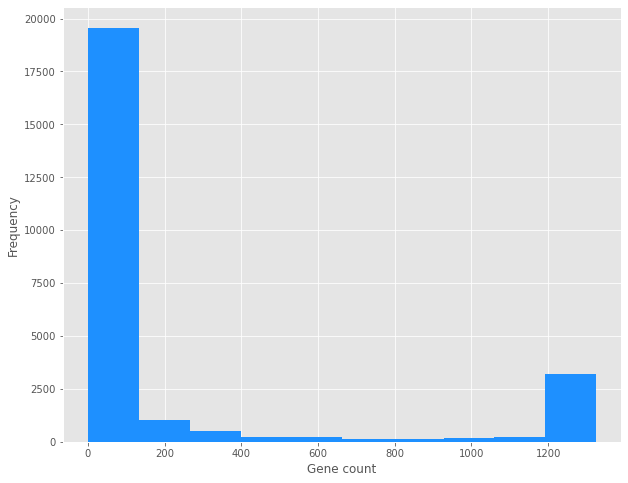

In [14]:
plt.figure(figsize=(10,8))
plt.hist(frequency1, color='dodgerblue')
plt.xlabel('Gene count')
plt.ylabel('Frequency')
plt.savefig("gene_count.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [15]:
frequency2 = data.sum(0)

In [16]:
frequency2

GCF_009363035    4319
GCF_016889545    4162
GCF_008065455    4216
GCF_015135355    4180
GCF_000026545    4335
                 ... 
GCF_000725305    3968
GCF_008124285    4011
GCF_017165375    4529
GCF_001663075    3875
GCF_000022665    3829
Length: 1324, dtype: int64

In [17]:
# plt.figure(figsize=(10,8))
# plt.hist(frequency2, bin=20, color='dodgerblue')
# plt.xlabel('Genome size')
# plt.ylabel('Gene Gamily Frequency')
# plt.savefig("genome_size.pdf", format="pdf", bbox_inches="tight")
# plt.show()

In [18]:
threshold_data = []
thresholds = np.linspace(0, 20, num=10)

for i in thresholds:
    row_sums = data.sum(axis=1)
    threshold_data.append(len(data[row_sums >= i]))

In [19]:
threshold_data

[25420, 17020, 14507, 13058, 12127, 11221, 10721, 10330, 10005, 9730]

In [20]:
thresholds

array([ 0.        ,  2.22222222,  4.44444444,  6.66666667,  8.88888889,
       11.11111111, 13.33333333, 15.55555556, 17.77777778, 20.        ])

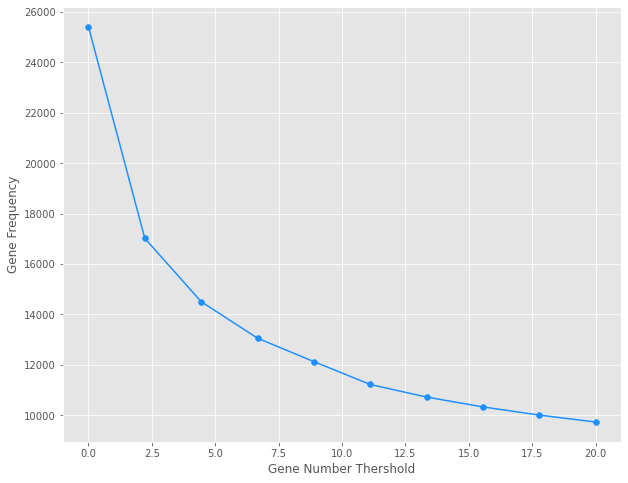

In [21]:
plt.figure(figsize=(10,8))
plt.scatter(thresholds, threshold_data, color='dodgerblue')
plt.plot(thresholds, threshold_data, color='dodgerblue')
plt.xlabel('Gene Number Thershold')
plt.ylabel('Gene Frequency')
plt.savefig("gene_frequency.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [22]:
data.transpose()

GF_ID,GF_1,GF_2,GF_3,GF_4,GF_5,GF_6,GF_7,GF_8,GF_9,GF_10,...,GF_31455,GF_31456,GF_31457,GF_31458,GF_31459,GF_31460,GF_31461,GF_31462,GF_31464,GF_31465
GCF_009363035,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
GCF_016889545,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
GCF_008065455,0,0,1,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
GCF_015135355,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
GCF_000026545,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCF_000725305,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
GCF_008124285,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
GCF_017165375,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
GCF_001663075,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


## 1.2) PCA

In [23]:
merged_df = pd.merge(data.transpose(), phylogroup_data, how='inner', left_index=True, right_on='AccessionID')

In [24]:
merged_df

,GF_1,GF_2,GF_3,GF_4,GF_5,GF_6,GF_7,GF_8,GF_9,GF_10,...,GF_31456,GF_31457,GF_31458,GF_31459,GF_31460,GF_31461,GF_31462,GF_31464,GF_31465,Phylogroup
AccessionID,,,,,,,,,,,,,,,,,,,,,
GCF_009363035,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,A
GCF_016889545,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,A
GCF_008065455,0,0,1,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,A
GCF_015135355,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,B1
GCF_000026545,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,B2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCF_000725305,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,A
GCF_008124285,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,A
GCF_017165375,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,E


In [25]:
# Apply PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(merged_df.iloc[:, :-1])
df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])

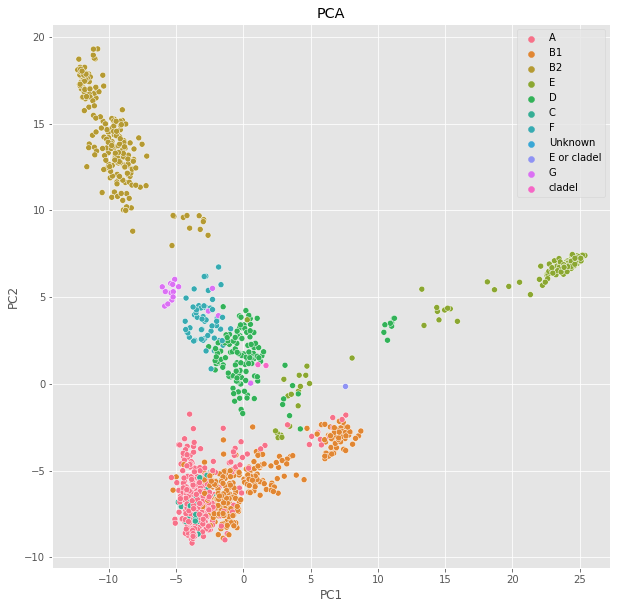

In [26]:
# Visualize the first two principal components
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', hue = merged_df.Phylogroup.tolist(), data=df_pca)
plt.title('PCA')
plt.savefig("PCA_graph.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [27]:
df_pca

,PC1,PC2
0,-3.560677,-6.627116
1,-2.650110,-7.136573
2,-0.299936,-6.008099
3,-4.996945,-5.365164
4,-2.953077,9.467883
...,...,...
1319,-4.086980,-7.939809
1320,-2.994488,-7.807337
1321,24.643630,7.241193
1322,-3.746872,-8.790185


In [28]:
shapiro_test_pc1 = shapiro(df_pca['PC1'])
shapiro_test_pc2 = shapiro(df_pca['PC2'])
print(f"Shapiro-Wilk Test for PC1: {shapiro_test_pc1}")
print(f"Shapiro-Wilk Test for PC2: {shapiro_test_pc2}")

Shapiro-Wilk Test for PC1: ShapiroResult(statistic=0.7767663598060608, pvalue=4.115196002779619e-39)
Shapiro-Wilk Test for PC2: ShapiroResult(statistic=0.8642287254333496, pvalue=2.3321049726457904e-32)


# 2) Data preprocessing  

In [29]:
row_sums = data.sum(axis=1)
filtered_data = data[row_sums >= 20]

In [30]:
filtered_data

,GCF_009363035,GCF_016889545,GCF_008065455,GCF_015135355,GCF_000026545,GCF_002012065,GCF_009650175,GCF_016903815,GCF_005221505,GCF_001559655,...,GCF_010365525,GCF_009832985,GCF_013374295,GCF_014168955,GCF_011769865,GCF_000725305,GCF_008124285,GCF_017165375,GCF_001663075,GCF_000022665
GF_ID,,,,,,,,,,,,,,,,,,,,,
GF_1,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
GF_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GF_14,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GF_17,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GF_18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GF_31460,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
GF_31461,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
GF_31462,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [31]:
data_array_t = np.array(filtered_data.transpose())

In [32]:
data_array_t

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

In [33]:
data_array_t.shape

(1324, 9730)

In [34]:
data_array_t.shape[1]

9730

In [35]:
# Converting to PyTorch tensor
data_tensor = torch.tensor(data_array_t, dtype=torch.float32)

# Spliting into train and test sets
train_data, val_data = train_test_split(data_tensor, test_size=0.2, random_state=12345)
train_data, test_data = train_test_split(data_tensor, test_size=0.25, random_state=12345)

# TensorDataset
train_dataset = TensorDataset(train_data)
val_dataset = TensorDataset(val_data)
test_dataset = TensorDataset(train_data)


# DataLoaders for main training
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Dataloader for overfitting on one sample (for dubbiging purposes)
input_dim = data_array_t.shape[1]
binary_data = torch.tensor(np.random.randint(0, 2, size=(1, input_dim)), dtype=torch.float32)
single_sample_dataset = TensorDataset(binary_data)
single_sample_loader = DataLoader(single_sample_dataset, batch_size=1, shuffle=True)

# Dataloader fot a small subset for overfitting (again, for debugging)
small_subset_indices = np.random.choice(len(train_dataset), size=256, replace=False)
small_subset = Subset(train_dataset, small_subset_indices)
small_loader = DataLoader(small_subset, batch_size=batch_size, shuffle=True)

In [36]:
len(train_dataset)

993

In [37]:
len(train_loader)

32

In [38]:
len(train_dataset)

993

In [39]:
len(val_dataset)

265

In [40]:
train_data

tensor([[1., 1., 0.,  ..., 1., 1., 1.],
        [0., 0., 0.,  ..., 1., 1., 1.],
        [0., 0., 0.,  ..., 1., 1., 1.],
        ...,
        [0., 0., 0.,  ..., 1., 1., 1.],
        [1., 1., 0.,  ..., 1., 1., 1.],
        [1., 1., 0.,  ..., 1., 1., 1.]])

In [41]:
TensorDataset(train_data)

In [42]:
TensorDataset(torch.tensor(train_data))

/var/folders/nx/hnfjrvz145n2_hzn95z65pmc0000gn/T/ipykernel_99940/4253064978.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TensorDataset(torch.tensor(train_data))


In [43]:
print(data_tensor)

tensor([[0., 0., 0.,  ..., 1., 1., 1.],
        [0., 0., 0.,  ..., 1., 1., 1.],
        [0., 0., 0.,  ..., 1., 1., 1.],
        ...,
        [0., 0., 0.,  ..., 1., 1., 1.],
        [0., 0., 0.,  ..., 1., 1., 1.],
        [0., 0., 0.,  ..., 1., 1., 1.]])


# 3) Overfitting on a single sample and small data subset

## 3.1) Overfitting on a single sample

In [44]:
single_sample = torch.randn(1, data_array_t.shape[1])

In [45]:
single_sample.shape[0]

1

In [46]:
# NO GRADIENT CLIPPING AND SCHEDULER 
hidden_dim = 512
latent_dim = 64
beta_start = 0.1
beta_end = 1.0
n_epochs = 10

model = VAE_single(input_dim, hidden_dim, latent_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Overfitting one sample to see if the model is broken 
model.train()
num_epochs = 1000

# Collecting data for visualisation 
train_loss_vals1 = []
train_loss_vals2 = []
kl_divergences_no_beta = []
kl_divergences_beta = []

for epoch in range(num_epochs):
    beta = beta_start + (beta_end - beta_start) * epoch / n_epochs
    epoch_kl_divergence = 0
    epoch_kl_divergence_beta = 0 
    
    for data in single_sample_loader:
        data = data[0].to(torch.float)
        # print(data)
        
        optimizer.zero_grad()
        reconstruction, mu, logvar = model(data)
        
        reconstruction_loss = nn.functional.binary_cross_entropy(reconstruction, data, reduction='sum')
        # print(reconstruction_loss.item())
        
        kl_divergence_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
        kl_divergence_loss_beta = beta * kl_divergence_loss
        epoch_kl_divergence += kl_divergence_loss.item()
        epoch_kl_divergence_beta += kl_divergence_loss_beta.item()
        
        # Total loss
        loss = reconstruction_loss + kl_divergence_loss
        loss2 = reconstruction_loss + kl_divergence_loss_beta
        
        # Backpropagation
        loss.backward()
        optimizer.step()   

    if epoch % 100 == 0:
        print(f"Epoch {epoch}\nLoss (method1) = {loss.item()}\nLoss (method2) = {loss2.item()}")

    train_loss_vals1.append(loss.item())
    train_loss_vals2.append(loss2.item())

    kl_divergences_no_beta.append(epoch_kl_divergence / len(single_sample_loader.dataset))
    kl_divergences_beta.append(epoch_kl_divergence_beta / len(single_sample_loader.dataset))

print(f"Final Loss after {num_epochs} epochs: {loss.item()}")

Epoch 0
Loss (method1) = 6837.41064453125
Loss (method2) = 6798.986328125
Epoch 100
Loss (method1) = 20.18302345275879
Loss (method2) = 20.231388092041016
Epoch 200
Loss (method1) = 8.336311340332031
Loss (method2) = 8.356642723083496
Epoch 300
Loss (method1) = 4.446784973144531
Loss (method2) = 4.467222213745117
Epoch 400
Loss (method1) = 2.731546401977539
Loss (method2) = 2.750636100769043
Epoch 500
Loss (method1) = 1.8533834218978882
Loss (method2) = 1.8704073429107666
Epoch 600
Loss (method1) = 1.3723061084747314
Loss (method2) = 1.3768004179000854
Epoch 700
Loss (method1) = 1.0043020248413086
Loss (method2) = 1.0056567192077637
Epoch 800
Loss (method1) = 0.8046810626983643
Loss (method2) = 0.8094719648361206
Epoch 900
Loss (method1) = 0.6371903419494629
Loss (method2) = 0.6394700407981873
Final Loss after 1000 epochs: 0.5251200199127197


In [47]:
torch.save(model.state_dict(), "saved_single_sample_VAE_1000.pt")
print("Model saved.")

Model saved.


In [48]:
epochs = np.linspace(1, 1000, num=1000)

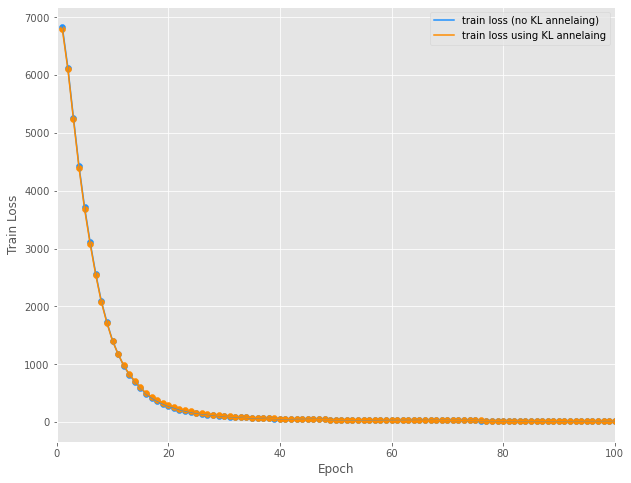

In [49]:
plt.figure(figsize=(10,8))
plt.scatter(epochs, train_loss_vals1, color='dodgerblue')
plt.plot(epochs, train_loss_vals1, label='train loss (no KL annelaing)', color='dodgerblue')
plt.scatter(epochs, train_loss_vals2, color='darkorange')
plt.plot(epochs, train_loss_vals2, label='train loss using KL annelaing', color='darkorange')
plt.xlim(0, 100)
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.legend()
plt.savefig("train_loss_comparisons_no_GS_1000.pdf", format="pdf", bbox_inches="tight")
plt.show()

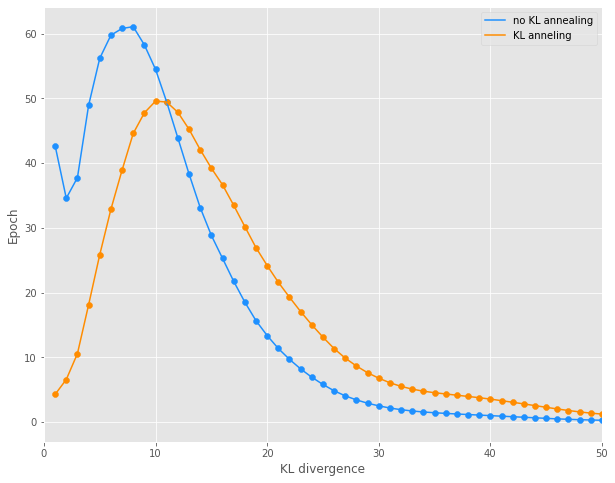

In [50]:
plt.figure(figsize=(10,8))
plt.scatter(epochs, kl_divergences_no_beta, color='dodgerblue')
plt.plot(epochs, kl_divergences_no_beta, label='no KL annealing', color='dodgerblue')
plt.scatter(epochs, kl_divergences_beta, color='darkorange')
plt.plot(epochs, kl_divergences_beta, label = 'KL anneling', color='darkorange')
plt.xlim(0, 50)
plt.xlabel('KL divergence')
plt.ylabel('Epoch')
plt.legend()
plt.savefig("kl_divergence_comparison_no_GC_1000.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [51]:
# GRADIENT CLIPPING PLUS SCHEDULER USED 
input_dim = data_array_t.shape[1]
hidden_dim = 512
latent_dim = 64
beta_start = 0.1
beta_end = 1.0
n_epochs = 10

# Model
model = VAE_single(input_dim, hidden_dim, latent_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Overfitting
model.train()
num_epochs = 1000 

# Gradient clipping and scheduler
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)

# Collecting data for visualisation 
train_loss_vals1 = []
train_loss_vals2 = []
kl_divergences_no_beta = []
kl_divergences_beta = []

for epoch in range(num_epochs):
    beta = beta_start + (beta_end - beta_start) * epoch / n_epochs
    epoch_kl_divergence = 0
    epoch_kl_divergence_beta = 0 

    for data in single_sample_loader:
        data = data[0].to(torch.float)

        # print(data)
        optimizer.zero_grad()
        reconstruction, mu, logvar = model(data)
        
        reconstruction_loss = nn.functional.binary_cross_entropy(reconstruction, data, reduction='sum')
        # print(reconstruction_loss.item())
        
        kl_divergence_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
        kl_divergence_loss_beta = beta * kl_divergence_loss
        epoch_kl_divergence += kl_divergence_loss.item()
        epoch_kl_divergence_beta += kl_divergence_loss_beta.item()
        
        # Total loss
        loss = reconstruction_loss + kl_divergence_loss
        loss2 = reconstruction_loss + kl_divergence_loss_beta
        
        # Backpropagation
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

    scheduler.step()  

    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss (method1) = {loss.item()}")
        print(f"Epoch {epoch}: Loss (method2) = {loss2.item()}")

    train_loss_vals1.append(loss.item())
    train_loss_vals2.append(loss2.item())

    kl_divergences_no_beta.append(epoch_kl_divergence / len(single_sample_loader.dataset))
    kl_divergences_beta.append(epoch_kl_divergence_beta / len(single_sample_loader.dataset))

print(f"Final Loss after {num_epochs} epochs: {loss.item()}")

Epoch 0: Loss (method1) = 6862.85791015625
Epoch 0: Loss (method2) = 6811.87890625
Epoch 100: Loss (method1) = 1.1808205842971802
Epoch 100: Loss (method2) = 1.1819602251052856
Epoch 200: Loss (method1) = 0.9604679346084595
Epoch 200: Loss (method2) = 0.9605107307434082
Epoch 300: Loss (method1) = 0.9619864821434021
Epoch 300: Loss (method2) = 0.9620440602302551
Epoch 400: Loss (method1) = 0.9622162580490112
Epoch 400: Loss (method2) = 0.9622894525527954
Epoch 500: Loss (method1) = 0.962877631187439
Epoch 500: Loss (method2) = 0.9629722833633423
Epoch 600: Loss (method1) = 0.9598356485366821
Epoch 600: Loss (method2) = 0.9599496126174927
Epoch 700: Loss (method1) = 0.9555248022079468
Epoch 700: Loss (method2) = 0.9556580781936646
Epoch 800: Loss (method1) = 0.96046382188797
Epoch 800: Loss (method2) = 0.960616409778595
Epoch 900: Loss (method1) = 0.9538496732711792
Epoch 900: Loss (method2) = 0.9540215730667114
Final Loss after 1000 epochs: 0.9673008322715759


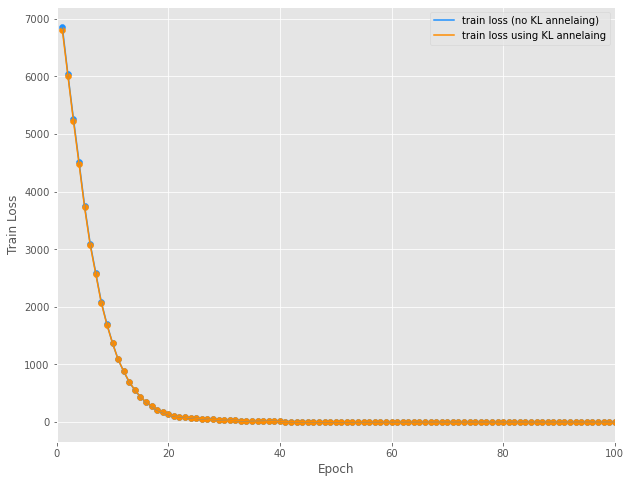

In [52]:
plt.figure(figsize=(10,8))
plt.scatter(epochs, train_loss_vals1, color='dodgerblue')
plt.plot(epochs, train_loss_vals1, label='train loss (no KL annelaing)', color='dodgerblue')
plt.scatter(epochs, train_loss_vals2, color='darkorange')
plt.plot(epochs, train_loss_vals2, label='train loss using KL annelaing', color='darkorange')
plt.xlim(0, 100)
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.legend()
plt.savefig("train_loss_comparisons_GS_1000.pdf", format="pdf", bbox_inches="tight")
plt.show()

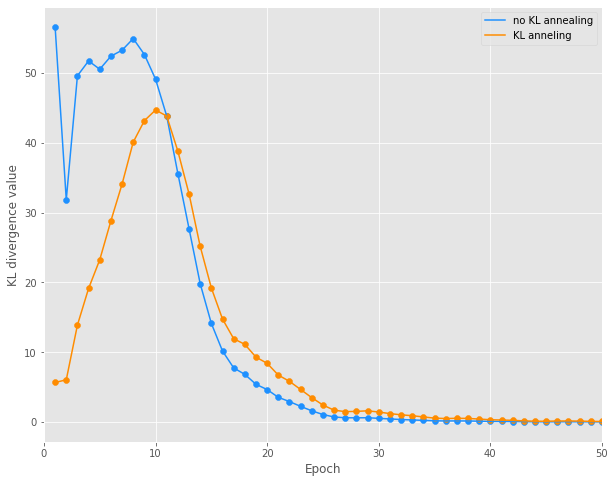

In [53]:
plt.figure(figsize=(10,8))
plt.scatter(epochs, kl_divergences_no_beta, color='dodgerblue')
plt.plot(epochs, kl_divergences_no_beta, label='no KL annealing', color='dodgerblue')
plt.scatter(epochs, kl_divergences_beta, color='darkorange')
plt.plot(epochs, kl_divergences_beta, label = 'KL anneling', color='darkorange')
plt.xlim(0, 50)
plt.xlabel('Epoch')
plt.ylabel('KL divergence value')
plt.legend()
plt.savefig("kl_divergence_comparison_GS_1000.pdf", format="pdf", bbox_inches="tight")
plt.show()

## 3.2) Overfitting on a small train subset

In [54]:
input_dim = data_array_t.shape[1]
hidden_dim = 512
latent_dim = 64
beta_start = 0.1
beta_end = 1.0

model = VAE(input_dim, hidden_dim, latent_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

model.train()
num_epochs = 1000  

train_loss_vals1 = []
# train_loss_vals2 = []
kl_divergences_no_beta = []
# kl_divergences_beta = []

for epoch in range(num_epochs):
    beta = beta_start + (beta_end - beta_start) * epoch / num_epochs
    epoch_kl_divergence = 0
    for data in small_loader:
        data = data[0].to(torch.float)
        # print(data)
    
        optimizer.zero_grad()
        reconstruction, mu, logvar = model(data)
        
        reconstruction_loss = nn.functional.binary_cross_entropy(reconstruction, data, reduction='sum')
        # print(reconstruction_loss.item())

        kl_divergence_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
        kl_divergence_loss_beta = beta * kl_divergence_loss
        epoch_kl_divergence += kl_divergence_loss.item()
        # epoch_kl_divergence_beta += kl_divergence_loss_beta.item()
        
        # Total loss
        loss = reconstruction_loss + kl_divergence_loss
        # loss2 = reconstruction_loss + kl_divergence_loss_beta
        
        loss.backward()
        optimizer.step()   

    if epoch % 100 == 0:
        print(f"Epoch {epoch}\nLoss (method1) = {loss.item()}")

    train_loss_vals1.append(loss.item())
    # train_loss_vals2.append(loss2.item())

    kl_divergences_no_beta.append(epoch_kl_divergence / len(small_loader.dataset))
    # kl_divergences_beta.append(epoch_kl_divergence_beta / len(small_loader.dataset))

print(f"Final Loss after {num_epochs} epochs: {loss.item()}")

Epoch 0
Loss (method1) = 97823.703125
Epoch 100
Loss (method1) = 42770.859375
Epoch 200
Loss (method1) = 21979.1796875
Epoch 300
Loss (method1) = 9258.560546875
Epoch 400
Loss (method1) = 19407.26171875
Epoch 500
Loss (method1) = 2703.139404296875
Epoch 600
Loss (method1) = 1667.4952392578125
Epoch 700
Loss (method1) = 2219.0771484375
Epoch 800
Loss (method1) = 13695.486328125
Epoch 900
Loss (method1) = 1379.8619384765625
Final Loss after 1000 epochs: 986.0534057617188


In [55]:
# Save trained model
torch.save(model.state_dict(), "saved_small_VAE1_100.pt")
print("Model saved.")

Model saved.


In [56]:
epochs = np.linspace(1, 1000, num=1000)

No handles with labels found to put in legend.


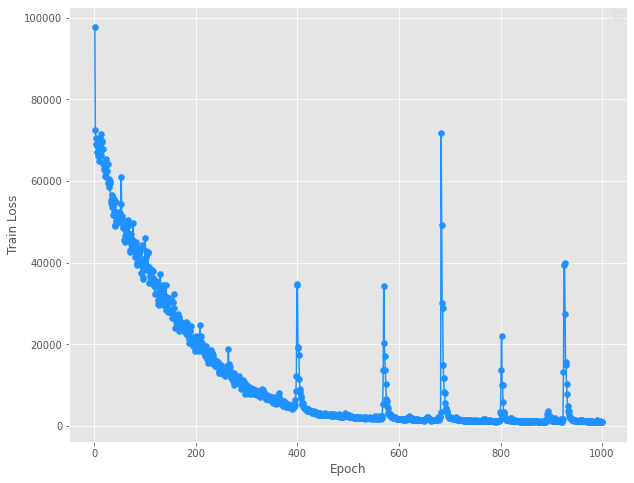

In [57]:
plt.figure(figsize=(10,8))
plt.scatter(epochs, train_loss_vals1, color='dodgerblue')
plt.plot(epochs, train_loss_vals1, color='dodgerblue')
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.legend()
plt.savefig("train_loss_small_ds1_100.pdf", format="pdf", bbox_inches="tight")
plt.show()

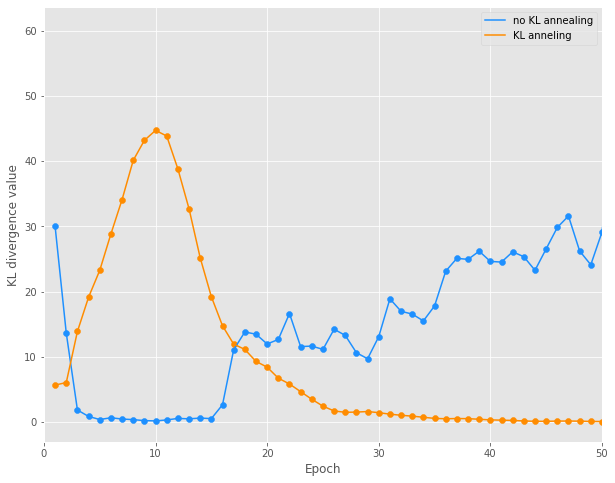

In [58]:
plt.figure(figsize=(10,8))
plt.scatter(epochs, kl_divergences_no_beta, color='dodgerblue')
plt.plot(epochs, kl_divergences_no_beta, label='no KL annealing', color='dodgerblue')
plt.scatter(epochs, kl_divergences_beta, color='darkorange')
plt.plot(epochs, kl_divergences_beta, label = 'KL anneling', color='darkorange')
plt.xlim(0, 50)
plt.xlabel('Epoch')
plt.ylabel('KL divergence value')
plt.legend()
plt.savefig("kl_divergence_comparison_GS_100.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [59]:
input_dim = data_array_t.shape[1]
hidden_dim = 512
latent_dim = 64
beta_start = 0.1
beta_end = 1.0

model = VAE(input_dim, hidden_dim, latent_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

model.train()
num_epochs = 1000  

# train_loss_vals1 = []
train_loss_vals2 = []
# kl_divergences_no_beta = []
kl_divergences_beta = []

for epoch in range(num_epochs):
    beta = beta_start + (beta_end - beta_start) * epoch / num_epochs
    epoch_kl_divergence_beta = 0
    for data in small_loader:
        data = data[0].to(torch.float)
        # print(data)
    
        optimizer.zero_grad()
        reconstruction, mu, logvar = model(data)
        
        reconstruction_loss = nn.functional.binary_cross_entropy(reconstruction, data, reduction='sum')
        # print(reconstruction_loss.item())

        kl_divergence_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
        kl_divergence_loss_beta = beta * kl_divergence_loss
        # epoch_kl_divergence += kl_divergence_loss.item()
        epoch_kl_divergence_beta += kl_divergence_loss_beta.item()
        
        # Total loss
        # loss = reconstruction_loss + kl_divergence_loss
        loss2 = reconstruction_loss + kl_divergence_loss_beta
        
        loss2.backward()
        optimizer.step()   

    if epoch % 100 == 0:
        print(f"Epoch {epoch}\nLoss (method 2) = {loss2.item()}")

    # train_loss_vals1.append(loss.item())
    train_loss_vals2.append(loss2.item())

    # kl_divergences_no_beta.append(epoch_kl_divergence / len(small_loader.dataset))
    kl_divergences_beta.append(epoch_kl_divergence_beta / len(small_loader.dataset))

print(f"Final Loss after {num_epochs} epochs: {loss2.item()}")

Epoch 0
Loss (method 2) = 92055.0078125
Epoch 100
Loss (method 2) = 26634.125
Epoch 200
Loss (method 2) = 20752.251953125
Epoch 300
Loss (method 2) = 14957.9501953125
Epoch 400
Loss (method 2) = 8436.59375
Epoch 500
Loss (method 2) = 16429.318359375
Epoch 600
Loss (method 2) = 2365.389892578125
Epoch 700
Loss (method 2) = 3315.1953125
Epoch 800
Loss (method 2) = 2205.25634765625
Epoch 900
Loss (method 2) = 1909.42578125
Final Loss after 1000 epochs: 4089.3251953125


In [60]:
# Save trained model
torch.save(model.state_dict(), "saved_small_VAE2_100.pt")
print("Model saved.")

Model saved.


No handles with labels found to put in legend.


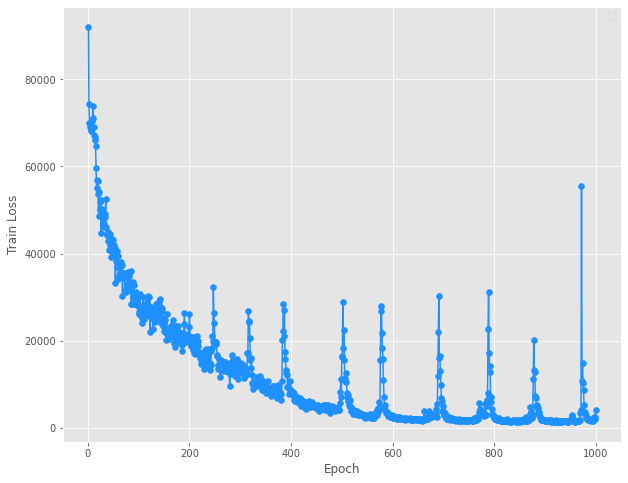

In [61]:
plt.figure(figsize=(10,8))
plt.scatter(epochs, train_loss_vals2, color='dodgerblue')
plt.plot(epochs, train_loss_vals2, color='dodgerblue')
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.legend()
plt.savefig("train_loss_small_ds2_100.pdf", format="pdf", bbox_inches="tight")
plt.show()

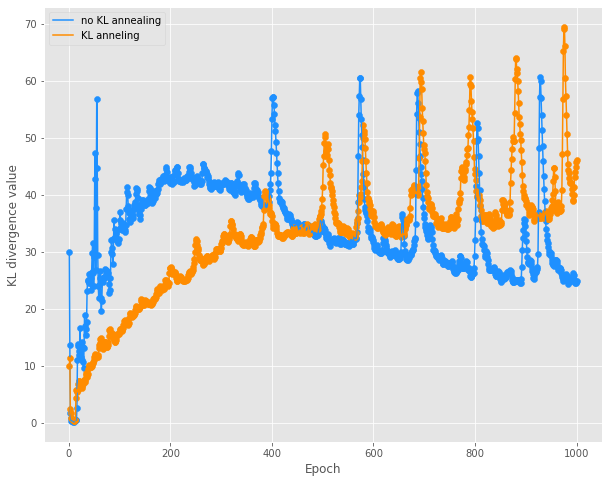

In [62]:
plt.figure(figsize=(10,8))
plt.scatter(epochs, kl_divergences_no_beta, color='dodgerblue')
plt.plot(epochs, kl_divergences_no_beta, label = 'no KL annealing', color='dodgerblue')
plt.scatter(epochs, kl_divergences_beta, color='darkorange')
plt.plot(epochs, kl_divergences_beta, label = 'KL anneling', color='darkorange')
# plt.xlim(0, 1000)
# plt.ylim(0, 20)
plt.xlabel('Epoch')
plt.ylabel('KL divergence value')
plt.legend()
plt.savefig("kl_divergence_comparison_1_2_100.pdf", format="pdf", bbox_inches="tight")
plt.show()

# 4) Training VAE model on full dataset (train + validation sets)

## 4.1) Training with no KL annealing 

In [63]:
# Model
input_dim = data_array_t.shape[1]
hidden_dim = 512
latent_dim = 64

model1 = VAE(input_dim, hidden_dim, latent_dim).to(device)

# Optimizer and scheduler
optimizer = torch.optim.Adam(model1.parameters(), lr=1e-3)
# scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10, eta_min=0)
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)

max_norm = 1.0 
beta_start = 0.1
beta_end = 1.0
n_epochs = 100

train_loss_vals, val_loss_vals = train_no_KL_annelaing(model=model1, optimizer=optimizer, scheduler=scheduler, n_epochs=n_epochs, train_loader=train_loader, val_loader=val_loader, max_norm=max_norm)

Epoch 10:
 Learning Rate: 0.001
 Train Loss (method 1): 1515.6988214375629
 Validation Loss: 1544.665776090802
Epoch 20:
 Learning Rate: 0.0005
 Train Loss (method 1): 1366.5307425415408
 Validation Loss: 1433.4086821933963
Epoch 30:
 Learning Rate: 0.0005
 Train Loss (method 1): 1239.6683542610776
 Validation Loss: 1369.8677771226414
Epoch 40:
 Learning Rate: 0.00025
 Train Loss (method 1): 1165.2178196594914
 Validation Loss: 1332.0826356132075
Epoch 50:
 Learning Rate: 0.00025
 Train Loss (method 1): 1114.3831488387461
 Validation Loss: 1317.3117740271227
Epoch 60:
 Learning Rate: 0.000125
 Train Loss (method 1): 1084.7562665219034
 Validation Loss: 1299.3853626179246
Epoch 70:
 Learning Rate: 0.000125
 Train Loss (method 1): 1055.8135463872104
 Validation Loss: 1293.3430498231132
Epoch 80:
 Learning Rate: 6.25e-05
 Train Loss (method 1): 1037.546703880287
 Validation Loss: 1292.8070349351415
Epoch 90:
 Learning Rate: 6.25e-05
 Train Loss (method 1): 1020.8972494964753
 Validation L

In [64]:
for batch in train_loader:
    if batch[0].size(0) > 0:
        print('+') 

+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+


In [65]:
data_array_t.shape[1]

9730

In [66]:
# Save trained model
torch.save(model1.state_dict(), "saved_no_KL_annealing_VAE_100.pt")
print("Model saved.")

Model saved.


In [67]:
epochs = np.linspace(1, 100, num=100)

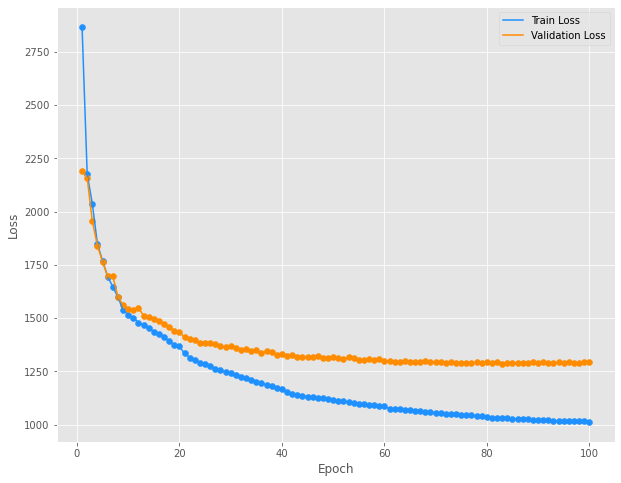

In [68]:
plt.figure(figsize=(10,8))
plt.scatter(epochs, train_loss_vals, color='dodgerblue')
plt.plot(epochs, train_loss_vals, label='Train Loss', color='dodgerblue')
plt.scatter(epochs, val_loss_vals, color='darkorange')
plt.plot(epochs, val_loss_vals, label='Validation Loss', color='darkorange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig("model_train_val_loss_1_100.pdf", format="pdf", bbox_inches="tight")
plt.show()

## 4.2) Training using KL annealing 

In [69]:
model2 = VAE(input_dim, hidden_dim, latent_dim).to(device)

# Optimizer and scheduler
optimizer = torch.optim.Adam(model2.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)

train_loss_vals2, val_loss_vals = train_with_KL_annelaing(model=model2, optimizer=optimizer, scheduler=scheduler, n_epochs=n_epochs, train_loader=train_loader, val_loader=val_loader, beta_start=beta_start, beta_end=beta_end, max_norm=max_norm)

Epoch 10:
 Learning Rate: 0.001
 Train Loss (method 2): 1420.5966453897988
 Validation Loss: 1469.6621499115565
Epoch 20:
 Learning Rate: 0.0005
 Train Loss (method 2): 1258.8372693325937
 Validation Loss: 1356.8001031839622
Epoch 30:
 Learning Rate: 0.0005
 Train Loss (method 2): 1154.4680525519457
 Validation Loss: 1313.6503353478774
Epoch 40:
 Learning Rate: 0.00025
 Train Loss (method 2): 1107.0267828166304
 Validation Loss: 1297.3364829009433
Epoch 50:
 Learning Rate: 0.00025
 Train Loss (method 2): 1055.3291489523342
 Validation Loss: 1278.6365860849057
Epoch 60:
 Learning Rate: 0.000125
 Train Loss (method 2): 1024.8263517842672
 Validation Loss: 1266.162319428066
Epoch 70:
 Learning Rate: 0.000125
 Train Loss (method 2): 1001.0310489466303
 Validation Loss: 1270.790256485849
Epoch 80:
 Learning Rate: 6.25e-05
 Train Loss (method 2): 986.6367204710316
 Validation Loss: 1274.694545990566
Epoch 90:
 Learning Rate: 6.25e-05
 Train Loss (method 2): 975.3747996842153
 Validation Loss

In [70]:
# Save trained model
torch.save(model2.state_dict(), "saved_KL_annealing_VAE_100.pt")
print("Model saved.")

Model saved.


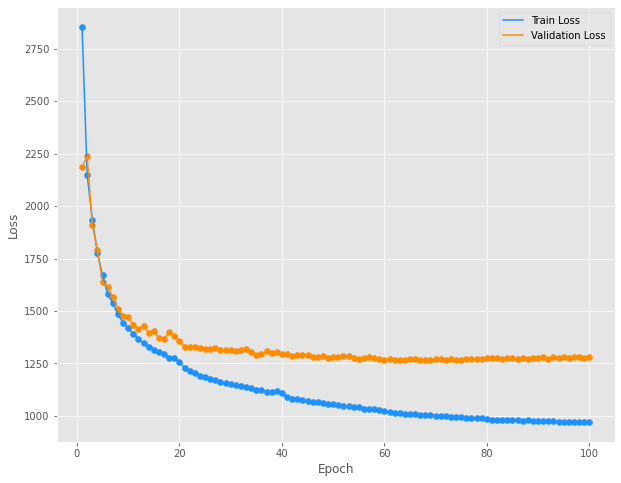

In [71]:
plt.figure(figsize=(10,8))
plt.scatter(epochs, train_loss_vals2, color='dodgerblue')
plt.plot(epochs, train_loss_vals2, label='Train Loss', color='dodgerblue')
plt.scatter(epochs, val_loss_vals, color='darkorange')
plt.plot(epochs, val_loss_vals, label='Validation Loss', color='darkorange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig("model_train_val_loss_2_100.pdf", format="pdf", bbox_inches="tight")
plt.show()

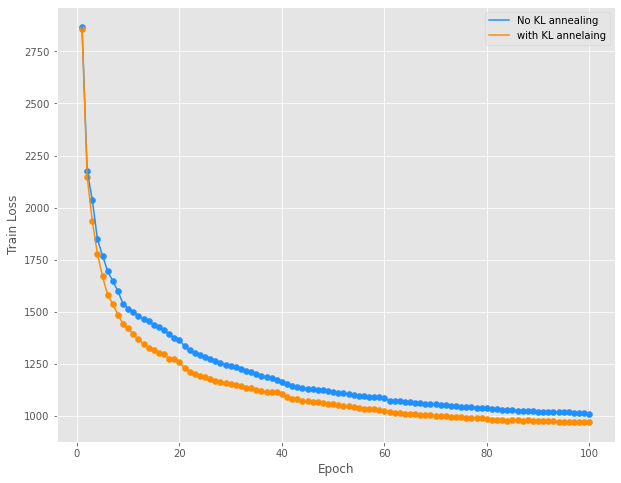

In [72]:
plt.figure(figsize=(10,8))
plt.scatter(epochs, train_loss_vals, color='dodgerblue')
plt.plot(epochs, train_loss_vals, label='No KL annealing', color='dodgerblue')
plt.scatter(epochs, train_loss_vals2, color='darkorange')
plt.plot(epochs, train_loss_vals2, label='with KL annelaing', color='darkorange')
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.legend()
plt.savefig("compare_first_second_train_losses_100.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [73]:
# # Load trained model 

# model = VAE(input_dim, hidden_dim, latent_dim)
# model.load_state_dict(torch.load('saved_KL_annealing_VAE.pt', map_location=device))
# model.eval()  

In [74]:
# recon_x, mu, logvar = model(data)

## 4.3) (Experiment) Training a MoG VAE (later)

In [75]:
# num_components = 3
# model2 = VAEWithMoGPrior(input_dim, hidden_dim, latent_dim, num_components).to(device)
# optimizer = torch.optim.Adam(model2.parameters(), lr=1e-3)
# scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10, eta_min=0)
# # scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True)

# train(model=model2, optimizer=optimizer, scheduler=scheduler, n_epochs=n_epochs, train_loader=train_loader, val_loader=val_loader, beta_start=beta_start, beta_end=beta_end, max_norm=max_norm)

In [76]:
# # save trained model
# torch.save(model2.state_dict(), "saved_MoG_VAE.pt")
# print("Model saved.")

# 5) Observing the latent spaces of the model(s) fitted

In [77]:
# Trying to get teh latent space
# Get latent variables
latents = get_latent_variables(model2, train_loader, device)

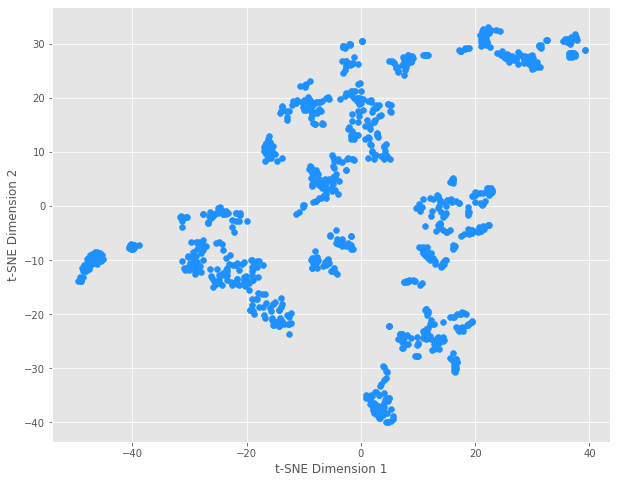

In [78]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2)
latents_2d = tsne.fit_transform(latents)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(latents_2d[:, 0], latents_2d[:, 1], color='dodgerblue')
# plt.xlim(-400, 400)
# plt.ylim(-400, 400)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.savefig("tsne_latent_space_visualisation.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [79]:
latents_2d

array([[-21.389547 , -11.7795   ],
       [ -9.563832 ,  17.843107 ],
       [ 16.388689 ,  -7.3747096],
       ...,
       [-29.389742 , -11.614099 ],
       [ 35.321323 ,  30.61365  ],
       [ 20.819977 ,  31.701227 ]], dtype=float32)

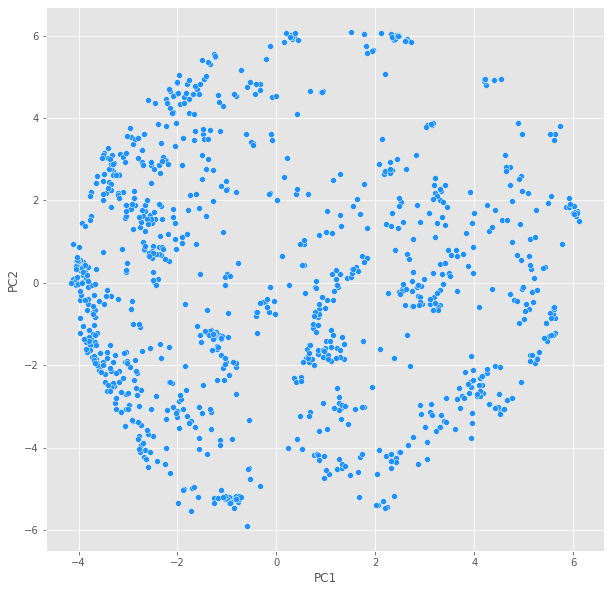

In [80]:
# Apply PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(latents)
df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])

# Visualize the first two principal components
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', data=df_pca, color='dodgerblue')
plt.savefig("pca_latent_space_visualisation.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [82]:
df_pca

,PC1,PC2
0,-3.269329,-2.918296
1,-3.632194,2.596382
2,4.157557,-2.466139
3,4.241812,4.807739
4,3.937526,-3.754189
...,...,...
988,-3.823966,0.190283
989,-0.984238,-1.309604
990,-3.715189,-0.550583
991,0.245838,-0.056052


# 5) Reconstruction/generation (evaluation) (to do later, just a test for now)

In [84]:
# Load trained model 
model = VAE(input_dim, hidden_dim, latent_dim)
model.load_state_dict(torch.load('saved_KL_annealing_VAE_100.pt'))  
model.eval()  

# Generate 10 new samples
num_samples = 10 
with torch.no_grad():
    z = torch.randn(num_samples, latent_dim)  # Sample from the standard normal distribution (????)
    generated_samples = model.decode(z).cpu().numpy() 

threshold = 0.5
binary_generated_samples = (generated_samples > threshold).astype(float)

print("Generated samples:\n", binary_generated_samples)
print("Generated samples:\n", generated_samples)


Generated samples:
 [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 1. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]
Generated samples:
 [[5.3297654e-03 5.2945721e-03 2.8929053e-02 ... 9.9998665e-01
  9.9998522e-01 9.9998391e-01]
 [5.1147254e-05 1.1712294e-03 3.1858619e-02 ... 9.9999833e-01
  9.9999821e-01 9.9999821e-01]
 [9.5717963e-03 1.8279692e-03 8.9961424e-02 ... 9.9996984e-01
  9.9996412e-01 9.9996555e-01]
 ...
 [2.6164154e-05 1.0238779e-05 8.8693257e-03 ... 9.9999964e-01
  9.9999964e-01 9.9999976e-01]
 [3.7855141e-02 6.5239292e-01 4.9742670e-03 ... 9.9999940e-01
  9.9999952e-01 9.9999940e-01]
 [1.0887117e-02 1.2274223e-02 4.0890891e-03 ... 9.9999702e-01
  9.9999726e-01 9.9999774e-01]]


# 6) Hyperparameter tuning

## 6.1) Gridserch for simple hyperparameter tuning

In [85]:
# # Gridsearch
# input_dim = data_array_t.shape[1]
# hidden_dim_values = [256, 512, 1024]
# latent_dim_values = [32, 64, 128]
# learning_rate_values = [0.01, 1e-3] # Decrease of learning rate causes higher average train loss, better if 0.01, 0.001
# # beta_start_values = [0.01, 0.1, 0.2]
# # beta_end_values = [0.5, 1.0, 2.0]
# # max_norm_values = [0.5, 1.0, 2.0]
# max_norm = 1.0 
# beta_start = 0.1
# beta_end = 1.0

# # beta_start, beta_end, max_norm
# for hidden_dim, latent_dim, learning_rate in itertools.product(
#     hidden_dim_values, latent_dim_values, learning_rate_values): #beta_start_values, beta_end_values, max_norm_values
#     print(f"Training with hidden_dim={hidden_dim}, latent_dim={latent_dim}, learning_rate={learning_rate}") # beta_start={beta_start}, beta_end={beta_end}, max_norm={max_norm}"
#     model = VAE(input_dim, hidden_dim, latent_dim).to(device)
#     optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#     scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)
#     train_with_KL_annelaing(model=model, optimizer=optimizer, scheduler=scheduler, n_epochs=10, train_loader=train_loader, val_loader=val_loader, beta_start=beta_start, beta_end=beta_end, max_norm=max_norm)
#     print("--------------------------------------------------------------------------------------")

### result - best params hidden_dim = 1024, latent_dim = 32, lr = 1e-3 (based on average train and val loss)

In [86]:
input_dim = data_array_t.shape[1]
hidden_dim = 1024
latent_dim = 32
max_norm = 1.0 
beta_start = 0.1
beta_end = 1.0
n_epochs = 100


model = VAE(input_dim, hidden_dim, latent_dim).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)

train_loss_vals2, val_loss_vals = train_with_KL_annelaing(model=model, optimizer=optimizer, scheduler=scheduler, n_epochs=n_epochs, train_loader=train_loader, val_loader=val_loader, beta_start=beta_start, beta_end=beta_end, max_norm=max_norm)

Epoch 10:
 Learning Rate: 0.001
 Train Loss (method 2): 1504.571509477475
 Validation Loss: 1637.4112286261793
Epoch 20:
 Learning Rate: 0.0005
 Train Loss (method 2): 1404.5403599119618
 Validation Loss: 1461.1295400943395
Epoch 30:
 Learning Rate: 0.0005
 Train Loss (method 2): 1236.5359062509835
 Validation Loss: 1339.6810583726415
Epoch 40:
 Learning Rate: 0.00025
 Train Loss (method 2): 1158.901831005515
 Validation Loss: 1343.799001326651
Epoch 50:
 Learning Rate: 0.00025
 Train Loss (method 2): 1105.7287008817582
 Validation Loss: 1316.3531397405661
Epoch 60:
 Learning Rate: 0.000125
 Train Loss (method 2): 1080.453761412898
 Validation Loss: 1320.81809035967
Epoch 70:
 Learning Rate: 0.000125
 Train Loss (method 2): 1047.2501250206524
 Validation Loss: 1327.9153007075472
Epoch 80:
 Learning Rate: 6.25e-05
 Train Loss (method 2): 1033.8957437167594
 Validation Loss: 1347.0683077830188
Epoch 90:
 Learning Rate: 6.25e-05
 Train Loss (method 2): 1019.7967226887038
 Validation Loss:

In [87]:
torch.save(model.state_dict(), "saved_KL_annealing_VAE_tuned_100.pt")
print("Model saved.")

Model saved.


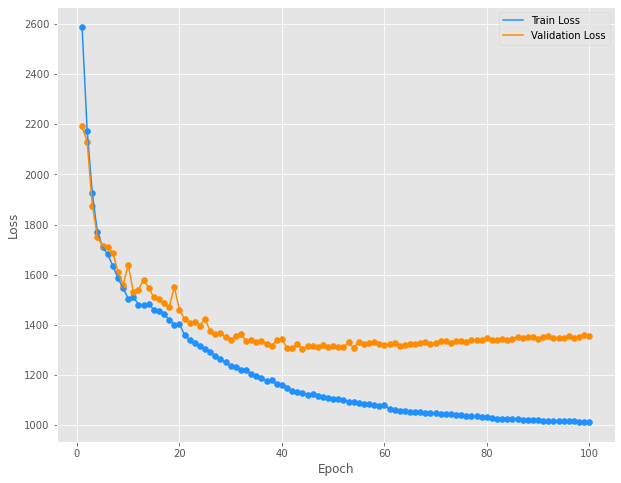

In [88]:
plt.figure(figsize=(10,8))
plt.scatter(epochs, train_loss_vals2, color='dodgerblue')
plt.plot(epochs, train_loss_vals2, label='Train Loss', color='dodgerblue')
plt.scatter(epochs, val_loss_vals, color='darkorange')
plt.plot(epochs, val_loss_vals, label='Validation Loss', color='darkorange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# AHPT - after hyperparameter tuning
plt.savefig("train_val_loss_AHPT_100.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [89]:
latents = get_latent_variables(model, train_loader, device)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(latents)
df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])

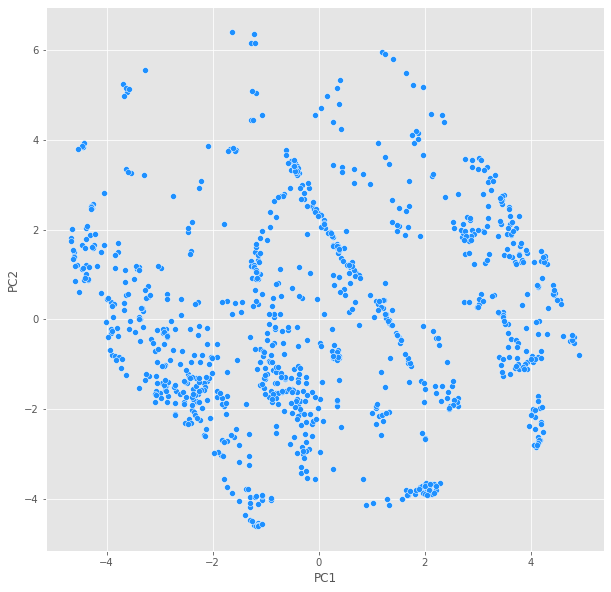

In [90]:
# Visualize the first two principal components
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', data=df_pca, color='dodgerblue')
# plt.xlim(-5, 5)
# plt.ylim(-5, 5)
# AHPT - after hyperparameter tuning
plt.savefig("pca_latent_space_visualisation_AHPT.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [91]:
len(latents)

993

In [92]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2)
data_tsne = tsne.fit_transform(latents)

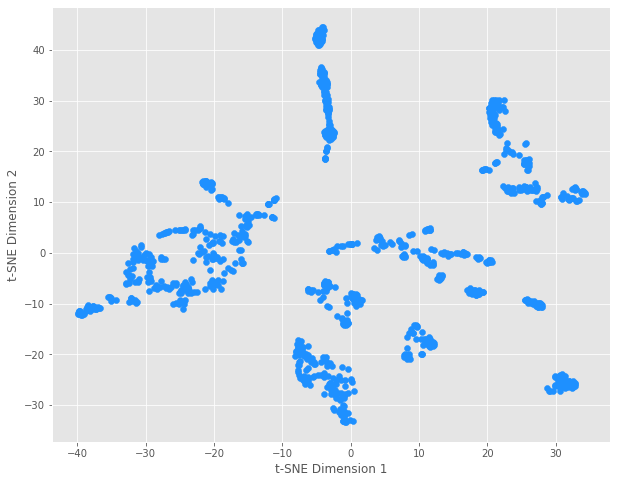

In [93]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data_tsne[:, 0], data_tsne[:, 1], color='dodgerblue')
# plt.xlim(-20, 20)
# plt.ylim(-20, 20)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
# AHPT - after hyperparameter tuning
plt.savefig("tsne_latent_space_visualisation_AHPT.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [94]:
len(data_tsne)

993

# 7) Evaluation test 

In [95]:
import sklearn

In [117]:
model = VAE(input_dim, hidden_dim, latent_dim)
model.load_state_dict(torch.load('saved_KL_annealing_VAE_tuned_100.pt'))  

model.eval()
with torch.no_grad():
    recon_x, mu, logvar = model(test_data)

recon_x_binarized = (recon_x > 0.5).int()

f1 = sklearn.metrics.f1_score(test_data.flatten(), recon_x_binarized.flatten())
print(f'F1 Score: {f1:.2f}')

F1 Score: 0.95
